# Explore here

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir la ruta del archivo relativa al directorio de trabajo actual
file_path = '../data/raw/AB_NYC_2019.csv'

# Cargar el archivo CSV
df = pd.read_csv(file_path)

# Mostrar un resumen estadístico del DataFrame
print(df.describe())


                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [3]:
# Obtener dimensiones del DataFrame
print("Dimensiones del DataFrame (filas, columnas):", df.shape)

# Obtener información sobre el DataFrame
print("\nInformación sobre el DataFrame:")
df.info()

Dimensiones del DataFrame (filas, columnas): (48895, 16)

Información sobre el DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  num

CONCLUSIONES:

Datos faltantes: Las columnas name, host_name, last_review y reviews_per_month tienen valores null.

Distribución de precios: La columna price tiene una media de $152.72 y una desviación estándar de $240.08, indicando una gran variabilidad en los precios. Hay valores atípicos con precios tan altos como $10,000.

Duración mínima(minimum_nights): La mediana de minimum_nights es 3, pero el máximo es 1250 noches, lo cual podría ser un error o una entrada inusual.

Número de reseñas(number_of_reviews) : La mayoría de los listados tienen un número de reseñas bajo, pero algunos tienen hasta 629 reseñas, lo que podría indicar listados populares o antiguos.

Disponibilidad(availability_365): La disponibilidad media es de aproximadamente 113 días al año, con algunos listados disponibles todo el año y otros no disponibles en absoluto.

In [4]:
# Verificar las dimensiones del DataFrame original
print("Dimensiones originales del DataFrame:", df.shape)

# Identificar duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

# Mostrar algunas filas duplicadas (si existen)
if num_duplicados > 0:
    print("Ejemplo de filas duplicadas:")
    print(df[duplicados].head())

# Eliminar duplicados
df_sin_duplicados = df.drop_duplicates()

# Verificar las dimensiones del DataFrame después de eliminar duplicados
print("Dimensiones del DataFrame después de eliminar duplicados:", df_sin_duplicados.shape)

Dimensiones originales del DataFrame: (48895, 16)
Número de filas duplicadas: 0
Dimensiones del DataFrame después de eliminar duplicados: (48895, 16)


In [5]:
#Eliminar información irrelevante

# Identificar columnas irrelevantes
columnas_irrelevantes = ['id', 'name', 'host_name', 'last_review','neighbourhood']

# Eliminar columnas irrelevantes
df_reducido = df.drop(columns=columnas_irrelevantes)

# Verificar las dimensiones del DataFrame después de eliminar las columnas irrelevantes
print("Dimensiones del DataFrame después de eliminar columnas irrelevantes:", df_reducido.shape)

# Mostrar las primeras filas del DataFrame reducido
print(df_reducido.head())

Dimensiones del DataFrame después de eliminar columnas irrelevantes: (48895, 11)
   host_id neighbourhood_group  latitude  longitude        room_type  price  \
0     2787            Brooklyn  40.64749  -73.97237     Private room    149   
1     2845           Manhattan  40.75362  -73.98377  Entire home/apt    225   
2     4632           Manhattan  40.80902  -73.94190     Private room    150   
3     4869            Brooklyn  40.68514  -73.95976  Entire home/apt     89   
4     7192           Manhattan  40.79851  -73.94399  Entire home/apt     80   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                  9               0.21   
1               1                 45               0.38   
2               3                  0                NaN   
3               1                270               4.64   
4              10                  9               0.10   

   calculated_host_listings_count  availability_365  
0                               6  

Columnas categóricas: Index(['neighbourhood_group', 'room_type'], dtype='object')


/tmp/ipykernel_661/3955216929.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_661/3955216929.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


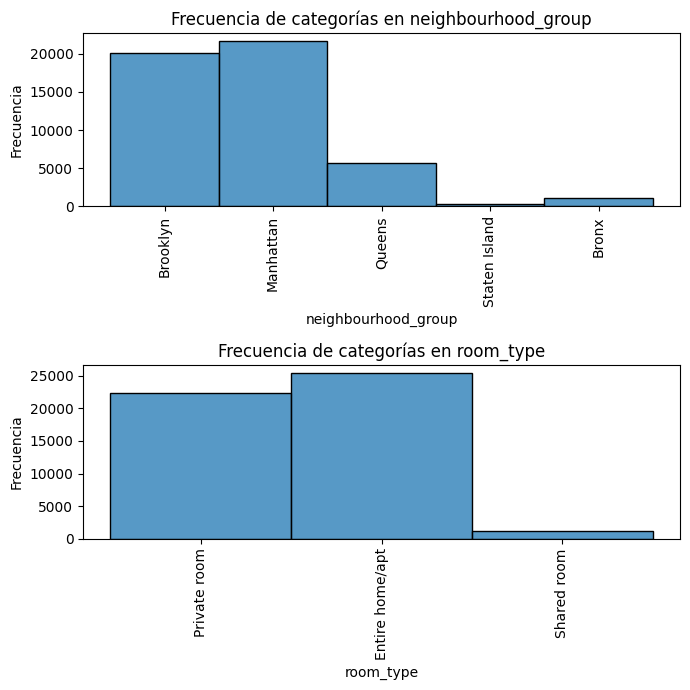

In [6]:
# Identificar columnas categóricas
columnas_categoricas = df_reducido.select_dtypes(include=['object']).columns
print("Columnas categóricas:", columnas_categoricas)

# Crear un grid de subplots
fig, axis = plt.subplots(2, 1, figsize=(7, 7))

# Asegurar que el número de columnas categóricas no exceda el número de subplots
columnas_categoricas = columnas_categoricas[:4]

# Graficar cada variable categórica en un subplot usando sns.histplot
for ax, columna in zip(axis.flatten(), columnas_categoricas):
    sns.histplot(data=df_reducido, x=columna, discrete=True, ax=ax)
    ax.set_title(f'Frecuencia de categorías en {columna}')
    ax.set_xlabel(columna)
    ax.set_ylabel('Frecuencia')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

"neighbourhood_group."
Se puede observar que ciertos grupos de vecindarios como Manhattan y Brooklyn tienen una mayor cantidad de listados en comparación con otros grupos como Staten Island.

"room_type."
Se puede concluir la preferencia de alquilar private room y entire home/aptm


Columnas numéricas: Index(['host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


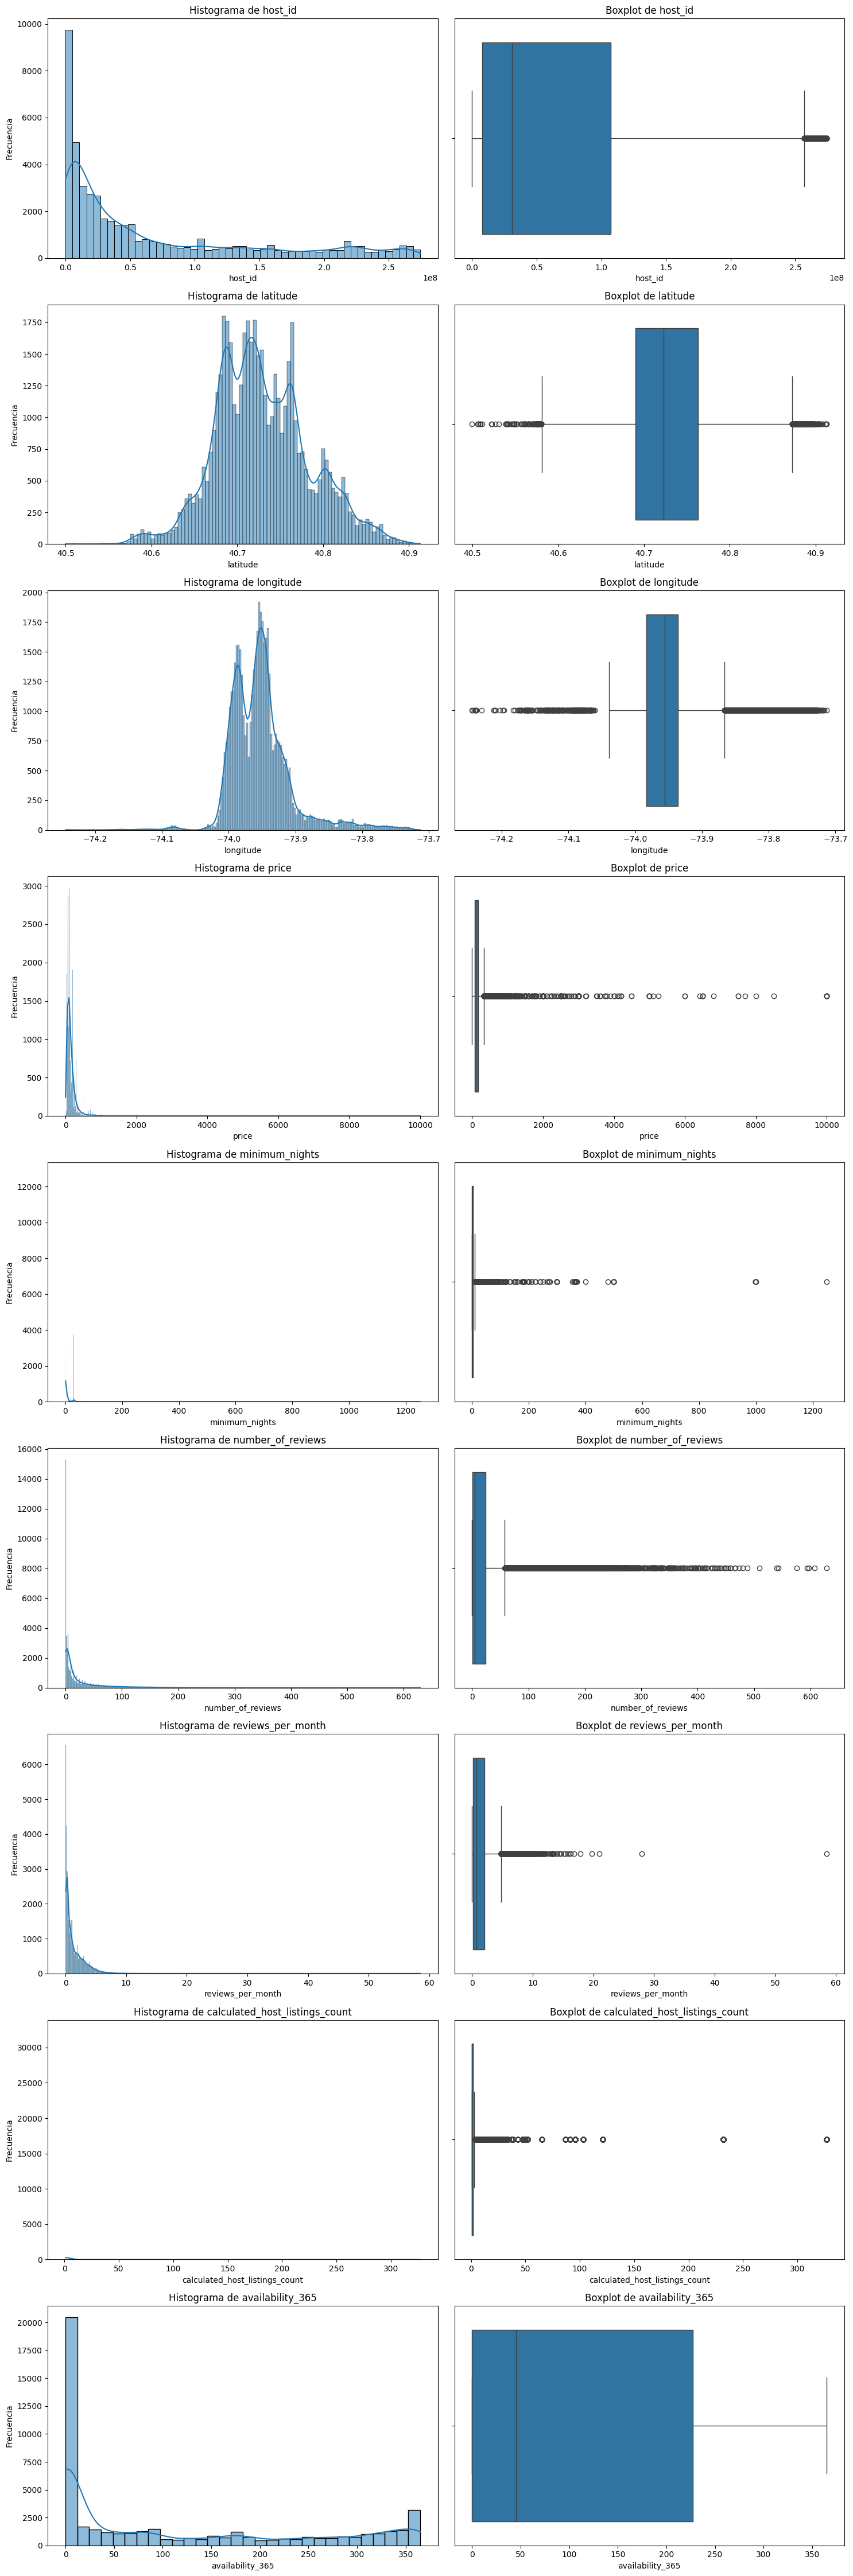

In [7]:
# Identificar columnas numéricas
columnas_numericas = df_reducido.select_dtypes(include=['number']).columns
print("Columnas numéricas:", columnas_numericas)

# Crear un grid de subplots para histogramas
fig, axis = plt.subplots(len(columnas_numericas), 2, figsize=(15, 5 * len(columnas_numericas)))

# Graficar cada variable numérica en subplots usando sns.histplot y sns.boxplot
for i, columna in enumerate(columnas_numericas):
    sns.histplot(data=df_reducido, x=columna, ax=axis[i, 0], kde=True)
    axis[i, 0].set_title(f'Histograma de {columna}')
    axis[i, 0].set_xlabel(columna)
    axis[i, 0].set_ylabel('Frecuencia')

    sns.boxplot(data=df_reducido, x=columna, ax=axis[i, 1])
    axis[i, 1].set_title(f'Boxplot de {columna}')
    axis[i, 1].set_xlabel(columna)
    
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

Análisis de variables multivariante:


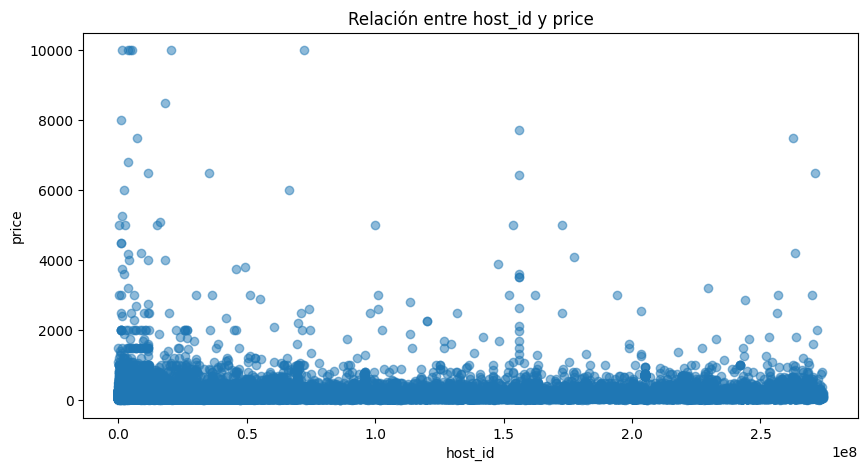

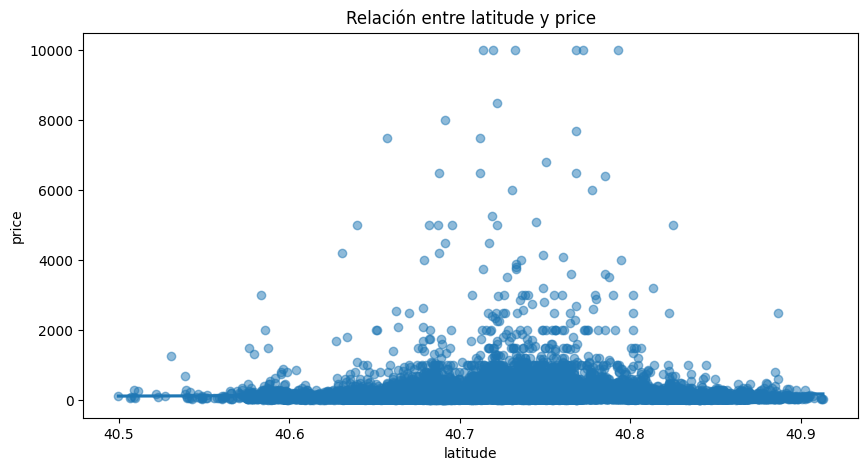

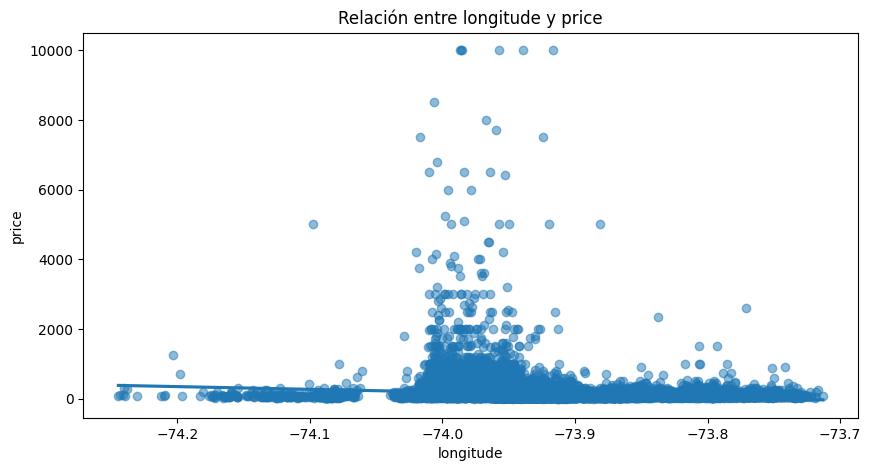

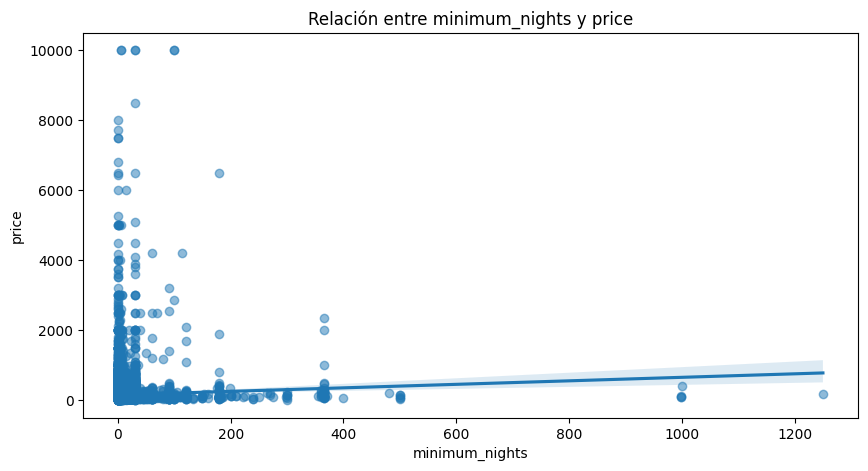

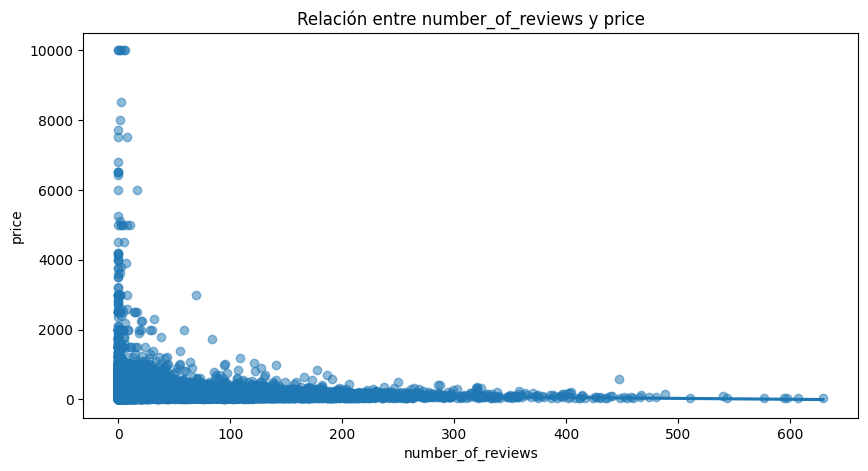

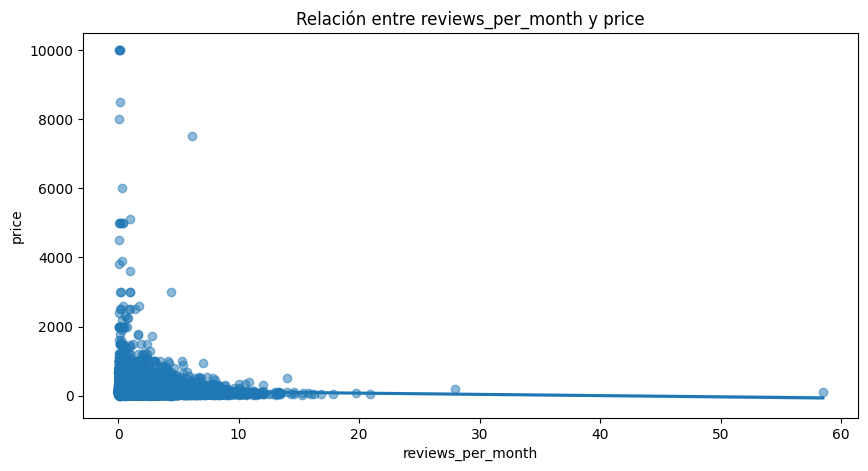

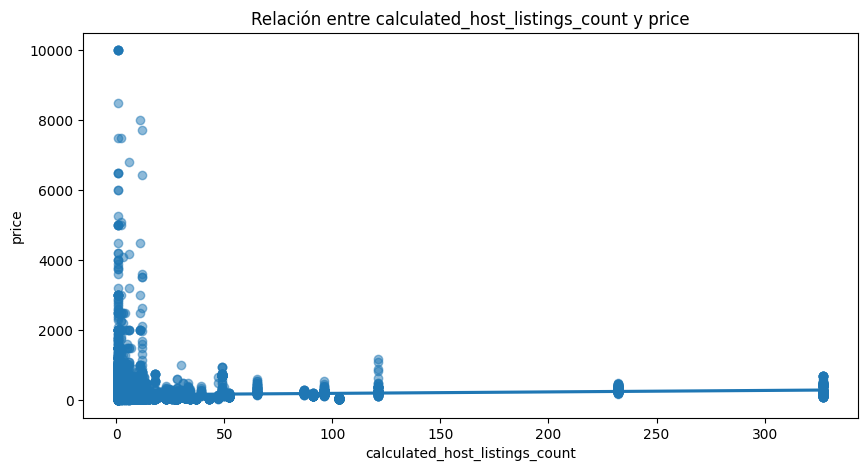

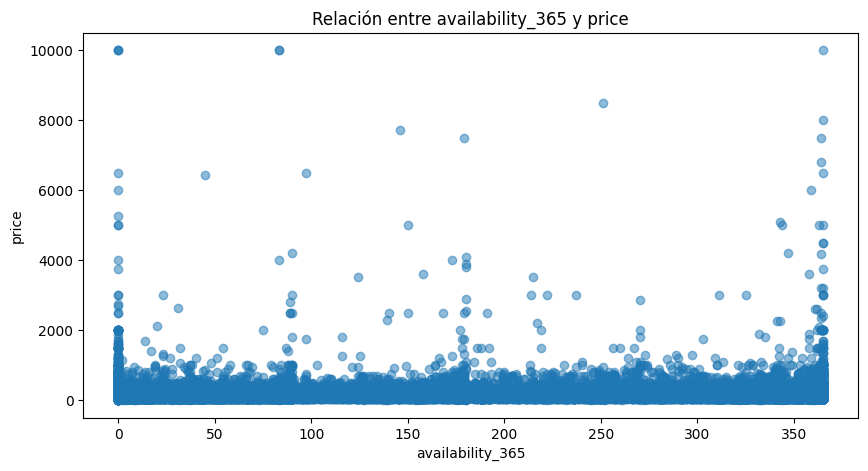

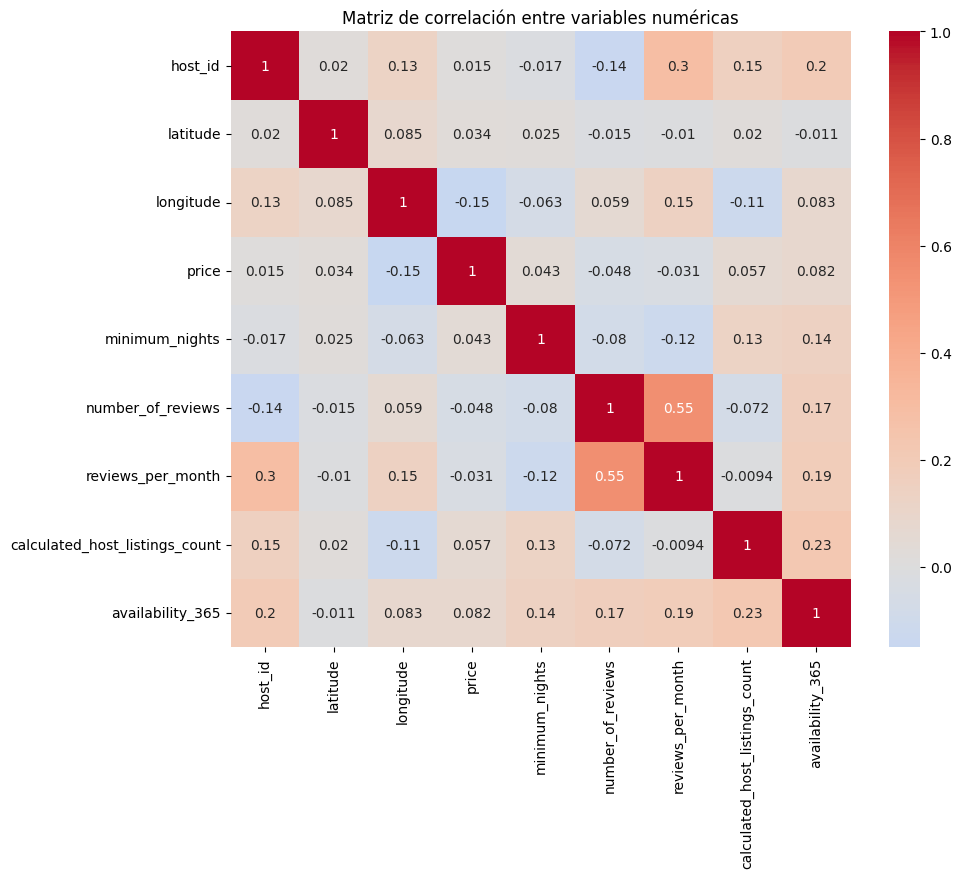

In [9]:

# Crear diagramas de dispersión con líneas de regresión para cada variable numérica en relación con 'price'
for columna in columnas_numericas:
    if columna != 'price':
        plt.figure(figsize=(10, 5))
        sns.regplot(data=df_reducido, x=columna, y='price', scatter_kws={'alpha':0.5})
        plt.title(f'Relación entre {columna} y price')
        plt.xlabel(columna)
        plt.ylabel('price')
        plt.show()

# Calcular la matriz de correlación
correlation_matrix = df_reducido[columnas_numericas].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

De este análisis de correlacion podemos concluir que no hay mucha correlación con el precio practicamente de ninguna variable.

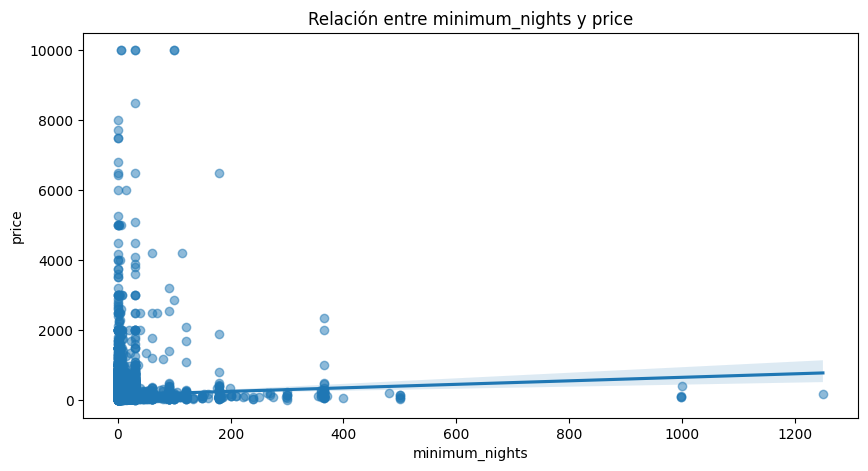

Correlación entre minimum_nights y price: 0.04


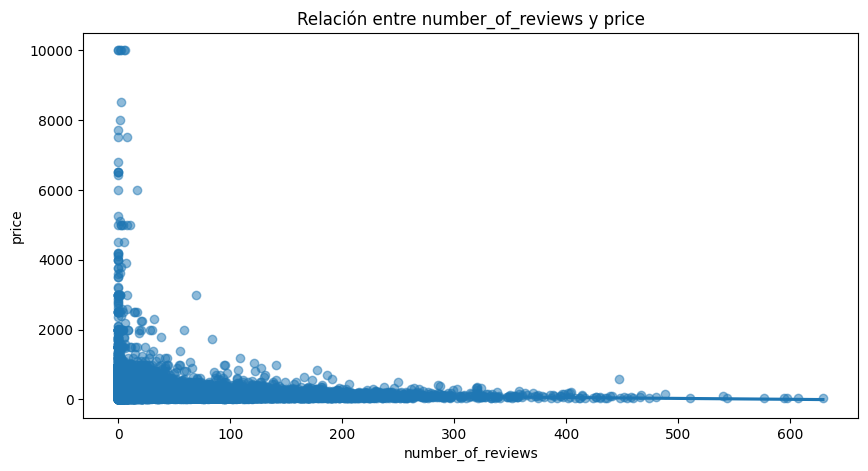

Correlación entre number_of_reviews y price: -0.05


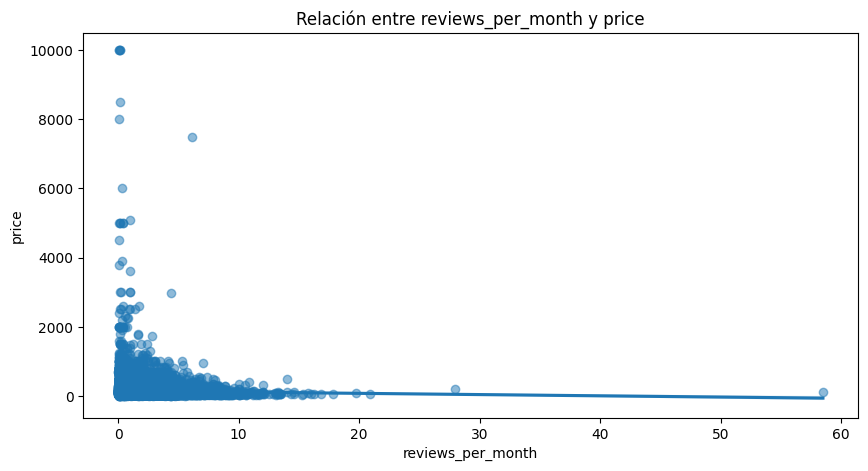

Correlación entre reviews_per_month y price: -0.03


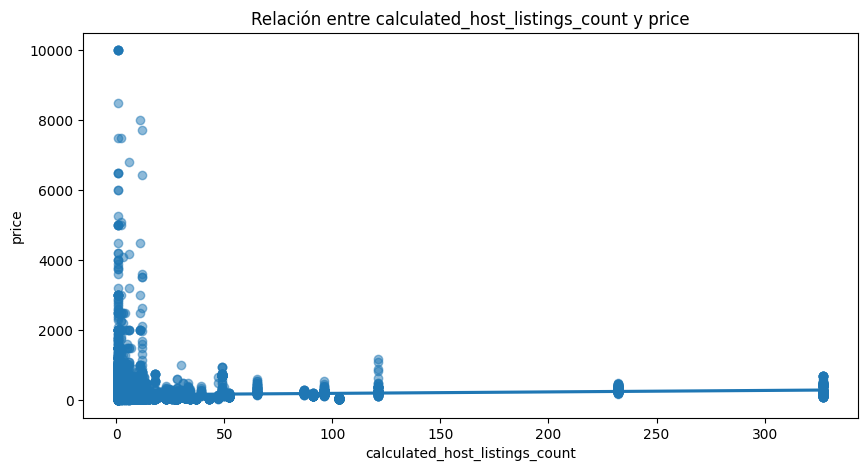

Correlación entre calculated_host_listings_count y price: 0.06


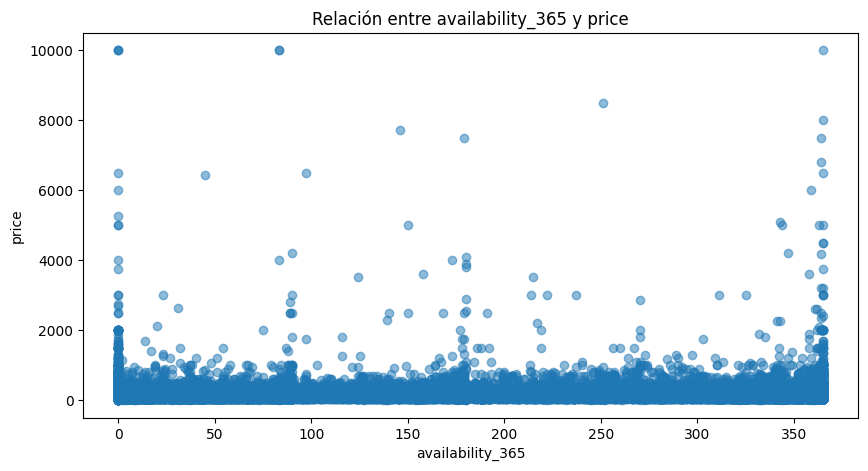

Correlación entre availability_365 y price: 0.08


In [11]:
# Función para graficar regplot y calcular correlación
def graficar_y_calcular_correlacion(df, var1, var2):
    plt.figure(figsize=(10, 5))
    sns.regplot(data=df, x=var1, y=var2, scatter_kws={'alpha':0.5})
    plt.title(f'Relación entre {var1} y {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()
    
    correlacion = df[[var1, var2]].corr().iloc[0, 1]
    print(f'Correlación entre {var1} y {var2}: {correlacion:.2f}')

# Variables relevantes para analizar en relación con 'price'
variables_relevantes = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Graficar y calcular correlación entre 'price' y cada variable relevante
for var in variables_relevantes:
    graficar_y_calcular_correlacion(df_reducido, var, 'price')

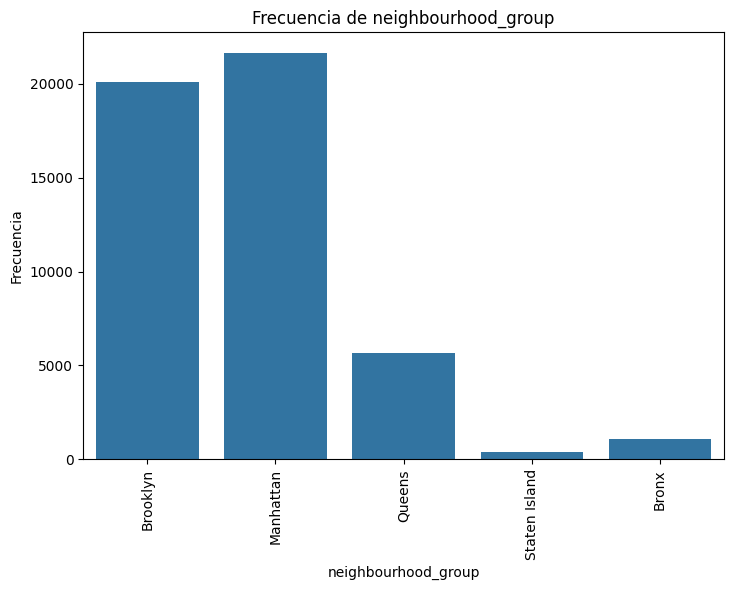

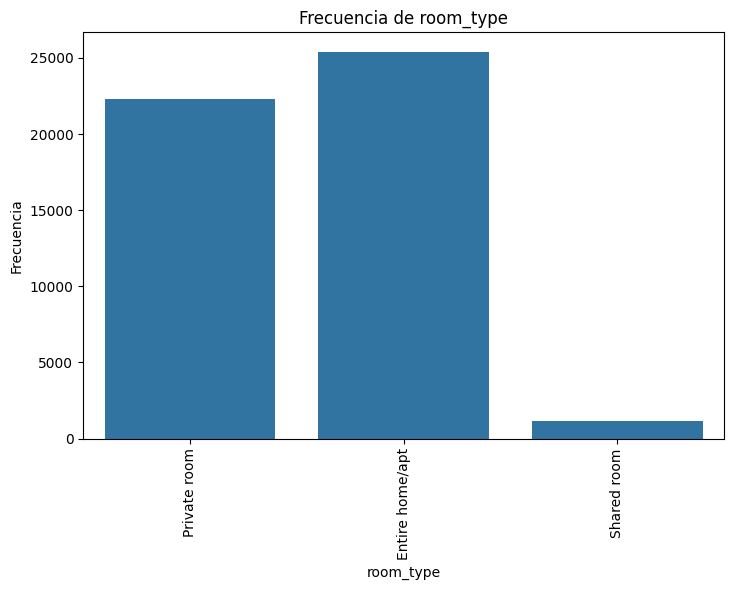

In [13]:
# Función para graficar countplot
def graficar_categoricas_vs_price(df, cat_var):
    plt.figure(figsize=(14, 6))
    
    # Gráfico de conteo (countplot)
    plt.subplot(1, 2, 2)
    sns.countplot(data=df, x=cat_var)
    plt.title(f'Frecuencia de {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()

# Graficar y analizar las variables categóricas relevantes en relación con 'price'
for cat_var in columnas_categoricas:
    graficar_categoricas_vs_price(df_reducido, cat_var)

Columnas restantes después de la eliminación: Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'reviews_per_month'],
      dtype='object')


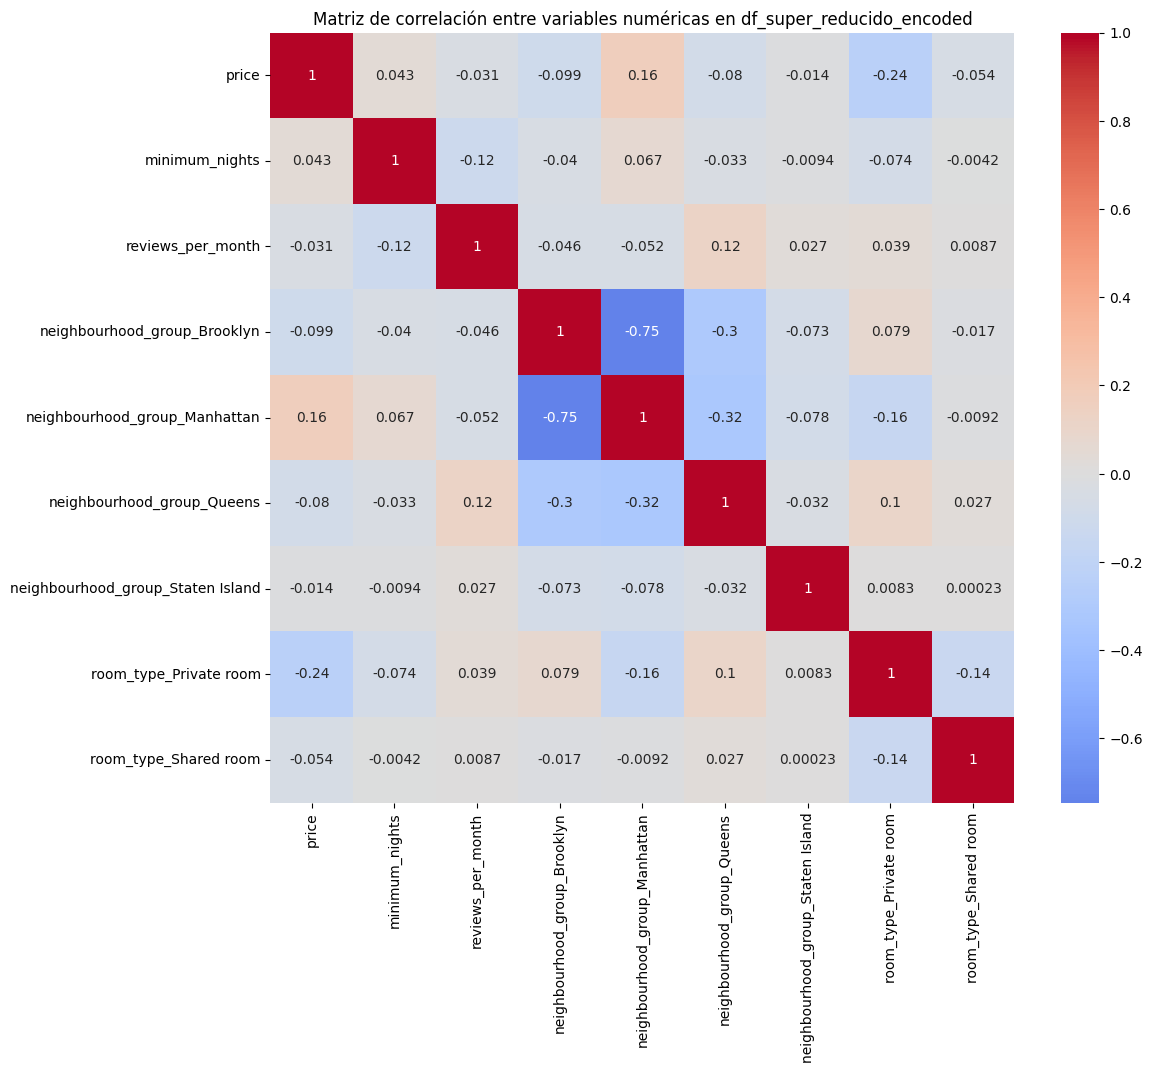

In [26]:
# Variables a eliminar basadas en el análisis de correlación
variables_a_eliminar = ['host_id', 'latitude', 'longitude', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

# Crear un nuevo DataFrame eliminando las variables identificadas
df_super_reducido = df_reducido.drop(columns=variables_a_eliminar)

# Verificar las columnas restantes en el DataFrame reducido
print("Columnas restantes después de la eliminación:", df_super_reducido.columns)

# Convertir variables categóricas a numéricas usando One-Hot Encoding
df_super_reducido_encoded = pd.get_dummies(df_super_reducido, columns=['neighbourhood_group', 'room_type'], drop_first=True)

# Calcular la matriz de correlación para el DataFrame codificado
correlation_matrix_super_reducido_encoded = df_super_reducido_encoded.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_super_reducido_encoded, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación entre variables numéricas en df_super_reducido_encoded')
plt.show()


Correlación entre price y otras variables:

price y minimum_nights (-0.043): La correlación es muy baja y negativa, lo que indica que la duración mínima de la estancia tiene una relación muy débil e inversa con el precio.

price y reviews_per_month (-0.031): La correlación es muy baja y negativa, sugiriendo que la frecuencia de las reseñas tiene poca relación con el precio.

price y neighbourhood_group_Brooklyn (-0.099): Hay una correlación baja y negativa, indicando que los listados en Brooklyn tienden a tener precios ligeramente más bajos.

price y neighbourhood_group_Manhattan (0.16): Hay una correlación baja pero positiva, sugiriendo que los listados en Manhattan tienden a tener precios más altos.

price y neighbourhood_group_Queens (-0.08): Hay una correlación baja y negativa, indicando que los listados en Queens tienden a tener precios ligeramente más bajos.

price y neighbourhood_group_Staten Island (0.014): La correlación es casi nula, sugiriendo que la ubicación en Staten Island no tiene una relación significativa con el precio.

price y room_type_Private room (-0.24): Hay una correlación moderada y negativa, indicando que los listados de habitaciones privadas tienden a tener precios más bajos.

price y room_type_Shared room (-0.054): La correlación es muy baja y negativa, indicando que los listados de habitaciones compartidas tienden a tener precios ligeramente más bajos.

Relaciones internas significativas:

minimum_nights y otras variables: No muestra correlaciones fuertes con otras variables, indicando que la duración mínima de la estancia es independiente de las otras características.

reviews_per_month y otras variables: Muestra una correlación moderada (0.12) con minimum_nights, indicando que la frecuencia de reseñas podría tener alguna relación con la duración mínima de la estancia.

Relaciones entre neighbourhood_group variables: Las ubicaciones están lógicamente correlacionadas negativamente entre sí debido a su naturaleza mutuamente excluyente.

room_type_Private room y room_type_Shared room (-0.14): Muestran una correlación negativa, lo cual es esperado ya que si un listado es una habitación privada, no puede ser una habitación compartida, y viceversa.


Basado en la correlación, neighbourhood_group_Manhattan y room_type_Private room parecen predictores clave.